In [10]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image

from utils import load_config
from model.vit import ViT
from dataset import FruitDataset

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
CONFIG_PATH = "logs/vit_fruit_classification/config.yaml"
IMAGE_PATH = "test_images/apple.jpeg"
MODEL_PATH = "logs/vit_fruit_classification/best_model.pth"

In [12]:
model_config = load_config(CONFIG_PATH)
model = ViT(model_config)

model.load_state_dict(torch.load(MODEL_PATH, map_location=torch.device("cpu")))
model.eval()
model.to(device)

print()

/var/folders/d_/sgchtvt54nx25xyy8vc28nq80000gn/T/ipykernel_95456/3114344839.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(MODEL_PATH, 

In [13]:
train_dataset = FruitDataset("./data/MY_data", split="test")
idx_to_class = train_dataset.idx_to_class

In [14]:
def predict(image):
    image = train_dataset.transform(image)
    image = image.to(device)
    if len(image.shape) == 3:
        image = image.unsqueeze(0)
    model.eval()

    # Forward pass
    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output, 1)

    return predicted.item()

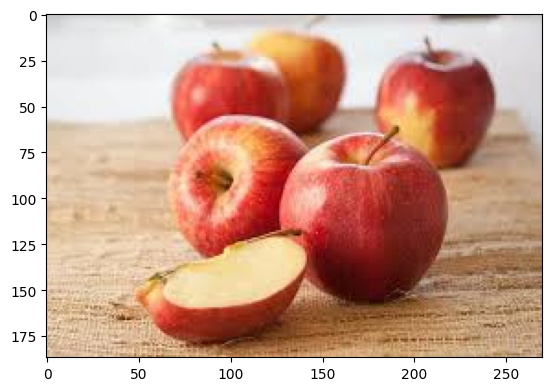

In [15]:
image = Image.open(IMAGE_PATH).convert("RGB")
plt.imshow(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


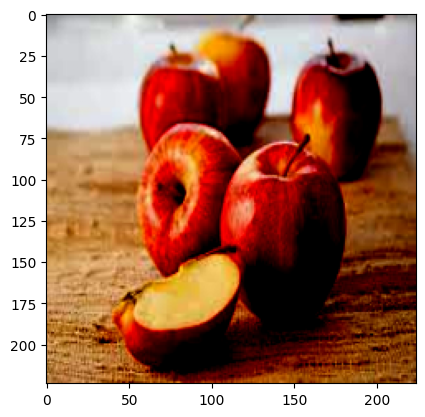

In [16]:
image_transform = train_dataset.transform(image)
image_transform.unsqueeze_(0)
plt.imshow(image_transform[0].permute(1, 2, 0).cpu().numpy())

In [17]:
idx_to_class[predict(image)]

'apple'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..

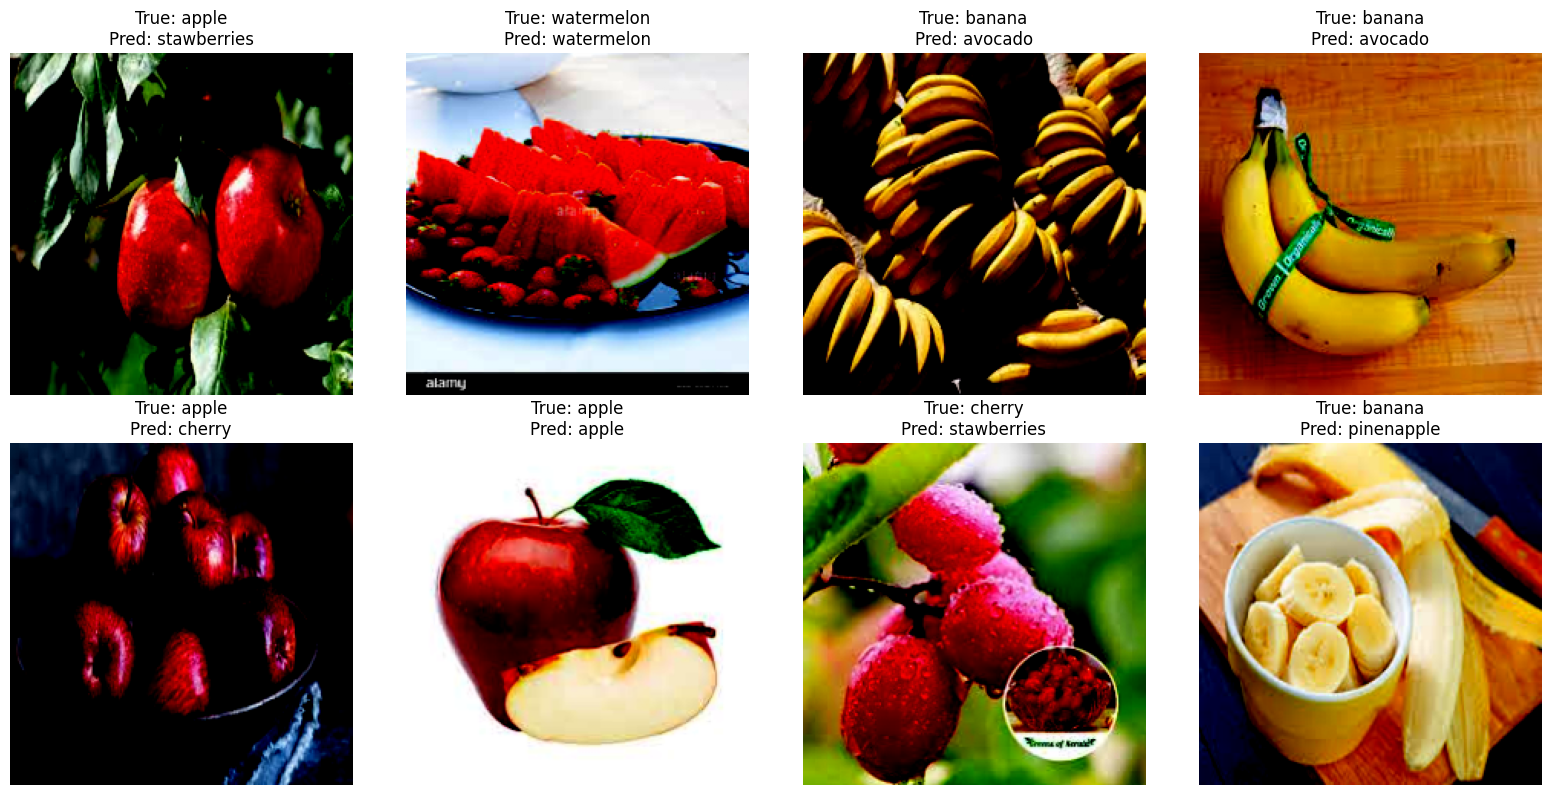

In [18]:
import matplotlib.pyplot as plt
import torch


samples = random.sample(range(len(train_dataset)), 8)
images, labels = zip(*[train_dataset[i] for i in samples])

# 组装为 batch
batch = torch.stack(images).to(device)
model.eval()
with torch.no_grad():
    outputs = model(batch)
    _, preds = torch.max(outputs, 1)

class_names = train_dataset.classes

# 可视化
plt.figure(figsize=(16, 8))
for i in range(8):
    img = images[i].permute(1, 2, 0).cpu().numpy()
    true_label = class_names[labels[i]]
    pred_label = class_names[preds[i].item()]

    plt.subplot(2, 4, i + 1)
    plt.imshow(img)
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis("off")

plt.tight_layout()
plt.show()